# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import kagglehub
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

# Reading the CSV

In [3]:
import pathlib
path = pathlib.Path(path)
csv = next(path.iterdir())

In [4]:
df = pd.read_csv(csv)

In [5]:
df.shape

(253680, 22)

In [10]:
df.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Features

## Target Variable
- **Diabetes_012**: Diabetes status (0 = no diabetes, 1 = prediabetes, 2 = diabetes)

## Health Conditions
- **HighBP**: High blood pressure (0 = no, 1 = yes)
- **HighChol**: High cholesterol (0 = no, 1 = yes)
- **CholCheck**: Cholesterol check in past 5 years (0 = no, 1 = yes)
- **Stroke**: Ever had a stroke (0 = no, 1 = yes)
- **HeartDiseaseorAttack**: Coronary heart disease or myocardial infarction (0 = no, 1 = yes)

## Physical Measurements
- **BMI**: Body Mass Index (continuous numeric value)

## Lifestyle Behaviors
- **Smoker**: Have you smoked at least 100 cigarettes in your entire life? (0 = no, 1 = yes)
- **PhysActivity**: Physical activity in past 30 days (not including job) (0 = no, 1 = yes)
- **Fruits**: Consume fruit 1 or more times per day (0 = no, 1 = yes)
- **Veggies**: Consume vegetables 1 or more times per day (0 = no, 1 = yes)
- **HvyAlcoholConsump**: Heavy alcohol consumption (adult men ≥14 drinks/week, adult women ≥7 drinks/week) (0 = no, 1 = yes)

## Healthcare Access
- **AnyHealthcare**: Have any kind of health care coverage (0 = no, 1 = yes)
- **NoDocbcCost**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0 = no, 1 = yes)

## Health Status (Self-Reported)
- **GenHlth**: General health rating (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)
- **MentHlth**: Number of days mental health was not good in past 30 days (0-30 days)
- **PhysHlth**: Number of days physical health was not good in past 30 days (0-30 days)
- **DiffWalk**: Difficulty walking or climbing stairs (0 = no, 1 = yes)

## Demographics
- **Sex**: Gender (0 = female, 1 = male)
- **Age**: Age category (1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44, 6 = 45-49, 7 = 50-54, 8 = 55-59, 9 = 60-64, 10 = 65-69, 11 = 70-74, 12 = 75-79, 13 = 80+)
- **Education**: Education level (1 = never attended school, 2 = elementary, 3 = some high school, 4 = high school graduate, 5 = some college, 6 = college graduate)
- **Income**: Income scale (1 = <$10k, 2 = <$15k, 3 = <$20k, 4 = <$25k, 5 = <$35k, 6 = <$50k, 7 = <$75k, 8 = ≥$75k)

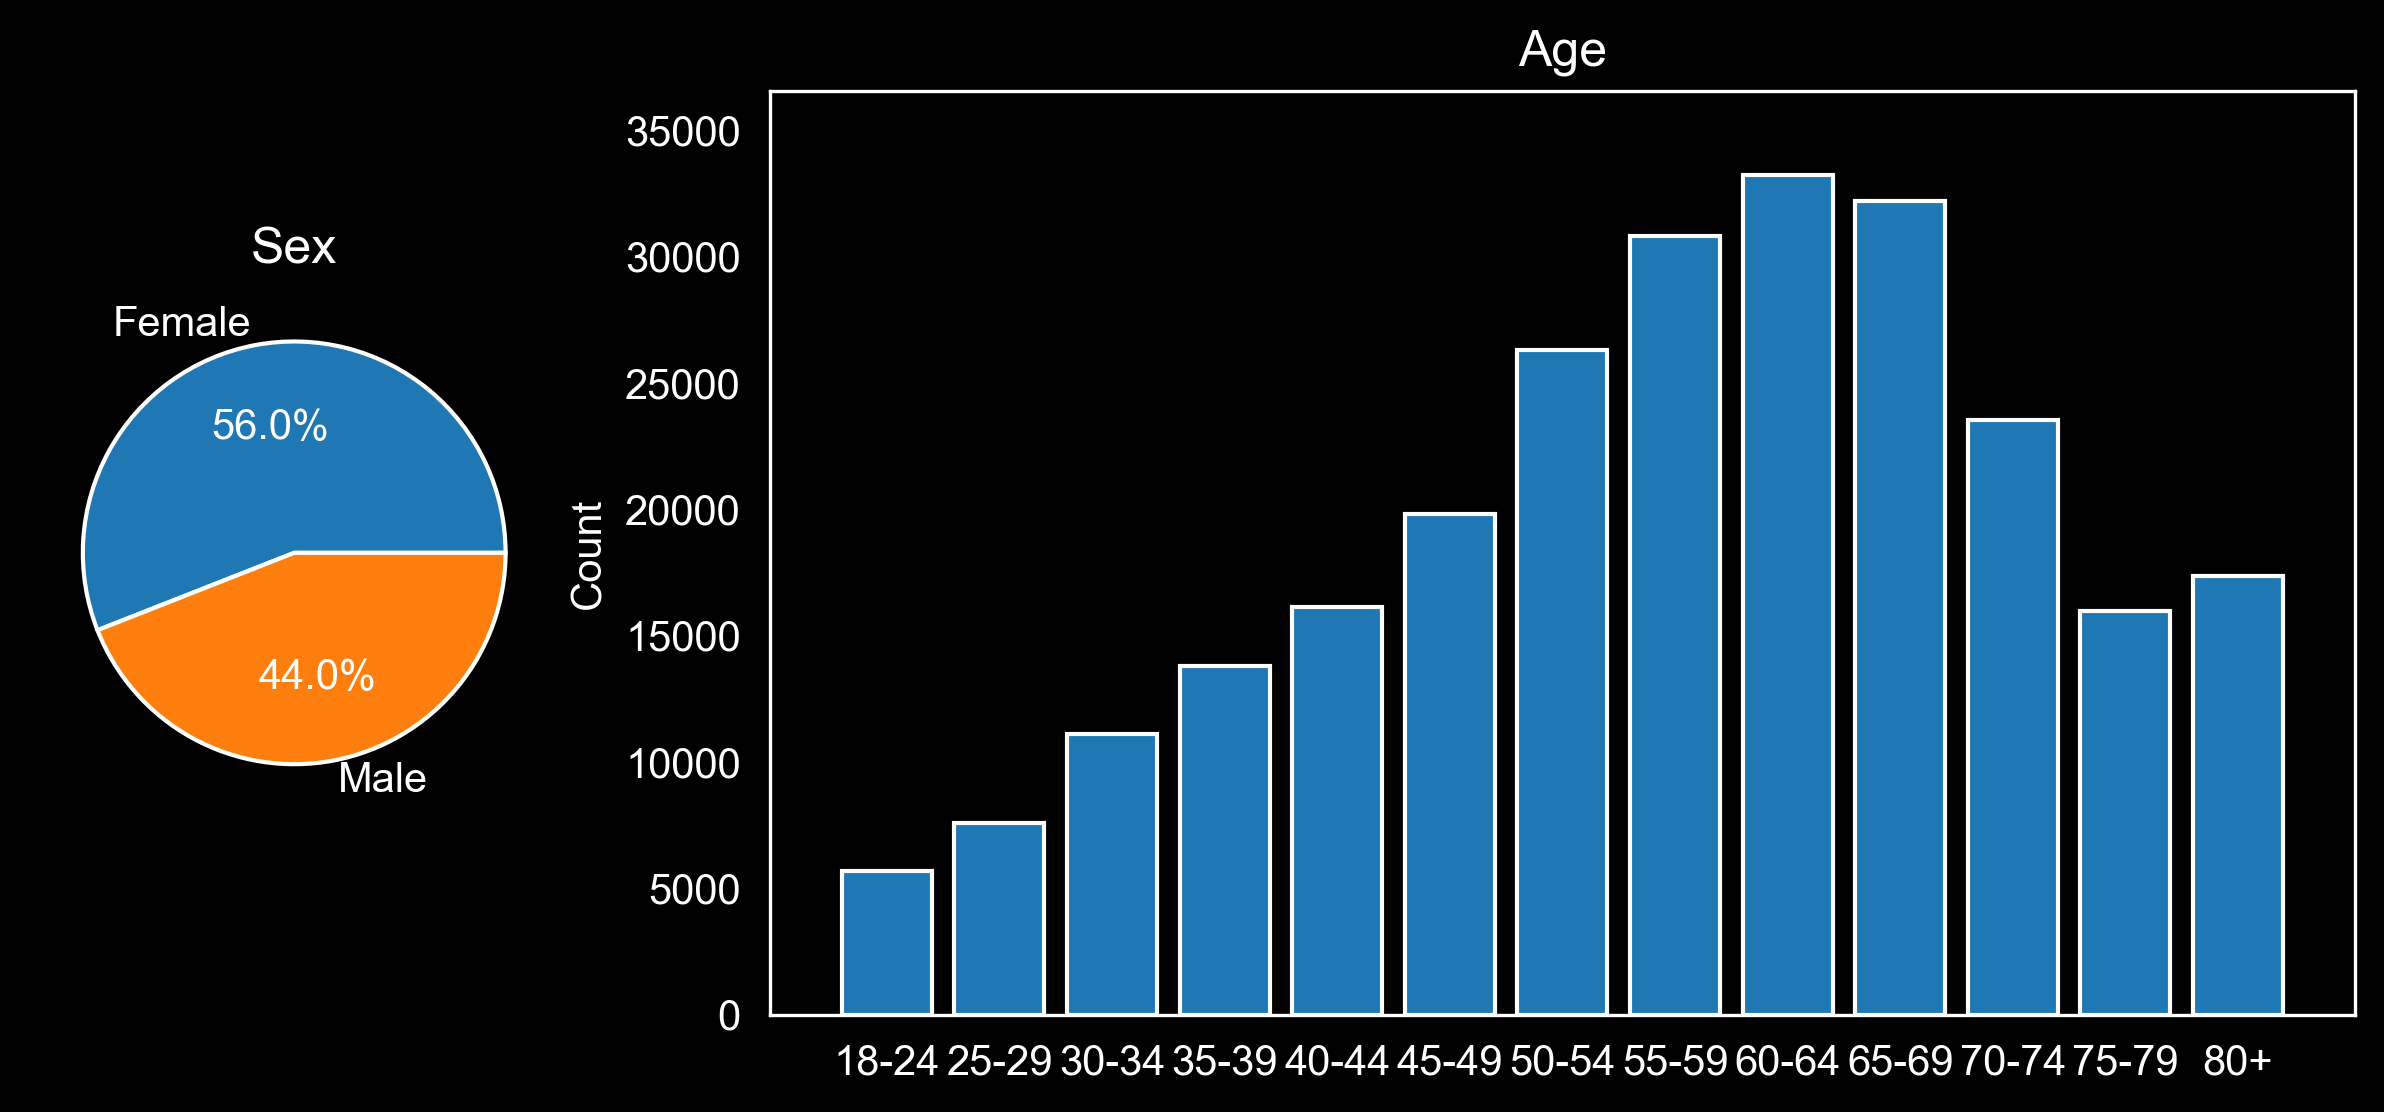

In [115]:
import seaborn as sns
sns.set_palette("tab10")

fig, ax = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 3]})
fig.dpi=300

counts = df['Sex'].value_counts()
ax[0].pie(counts, labels=['Female', 'Male'], autopct='%1.1f%%')
ax[0].set_title("Sex")

age_map = {
    1: "18-24",
    2: "25-29",
    3: "30-34",
    4: "35-39",
    5: "40-44",
    6: "45-49",
    7: "50-54",
    8: "55-59",
    9: "60-64",
    10: "65-69",
    11: "70-74",
    12: "75-79",
    13: "80+"
}
ages = df['Age'].map(age_map).value_counts()
ages = ages.reindex(ages.index.sort_values())

ax[1].bar(ages.index, height=ages)
ax[1].set_title("Age")
ax[1].set_ylabel("Count")
ax[1].set_ylim(0, ages.max()*1.1)

plt.grid(False)
plt.savefig("age_sex_graph.png", dpi=300)

plt.show()